# Chapter 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

df_str = ',x_coordinate,y_coordinate,x_scaled,y_scaled\n0,17,4,0.5093490504878759,0.0900098453652847\n1,20,6,0.59923417704456,0.13501476804792703\n2,35,0,1.04865980982798,0.0\n3,14,0,0.419463923931192,0.0\n4,37,4,1.1085832275324359,0.0900098453652847\n5,33,3,0.9887363921235239,0.06750738402396352\n6,14,1,0.419463923931192,0.022502461341321174\n7,30,6,0.8988512655668399,0.13501476804792703\n8,35,5,1.04865980982798,0.11251230670660586\n9,17,4,0.5093490504878759,0.0900098453652847\n10,11,6,0.32957879737450796,0.13501476804792703\n11,21,10,0.629195885896788,0.22502461341321173\n12,13,8,0.389502215078964,0.1800196907305694\n13,10,10,0.29961708852228,0.22502461341321173\n14,81,97,2.426898417030468,2.182738750108154\n15,84,94,2.516783543587152,2.11523136608419\n16,87,99,2.606668670143836,2.227743672790796\n17,83,95,2.486821834734924,2.1377338274255115\n18,90,95,2.69655379670052,2.1377338274255115\n19,97,97,2.9062857586661157,2.182738750108154\n20,94,99,2.8164006321094317,2.227743672790796\n21,88,99,2.6366303789960637,2.227743672790796\n22,89,94,2.666592087848292,2.11523136608419\n23,93,99,2.786438923257204,2.227743672790796\n24,92,90,2.756477214404976,2.0252215207189055\n25,82,98,2.4568601258826956,2.205241211449475\n26,81,100,2.426898417030468,2.250246134132117\n27,92,93,2.756477214404976,2.092728904742869\n28,91,98,2.7265155055527477,2.205241211449475\n29,22,15,0.6591575947490159,0.3375369201198176\n30,23,10,0.689119303601244,0.22502461341321173\n31,25,0,0.7490427213056999,0.0\n32,25,10,0.7490427213056999,0.22502461341321173\n33,27,7,0.8089661390101559,0.15751722938924823\n34,17,17,0.5093490504878759,0.38254184280245995\n35,17,15,0.5093490504878759,0.3375369201198176\n'
comic_con = pd.read_csv(StringIO(df_str))
comic_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    36 non-null     int64  
 1   x_coordinate  36 non-null     int64  
 2   y_coordinate  36 non-null     int64  
 3   x_scaled      36 non-null     float64
 4   y_scaled      36 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.5 KB


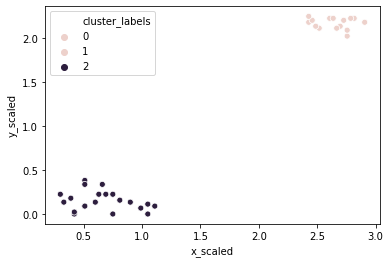

In [3]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

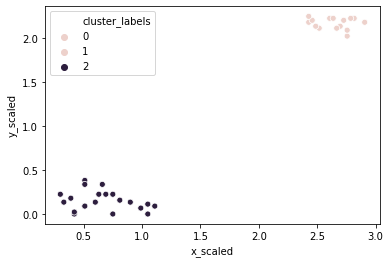

In [5]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

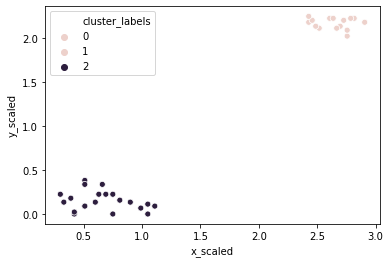

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

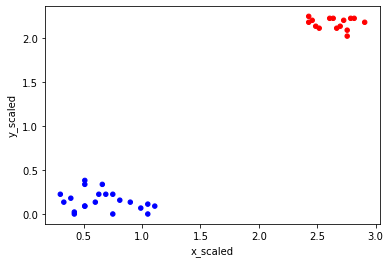

In [9]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

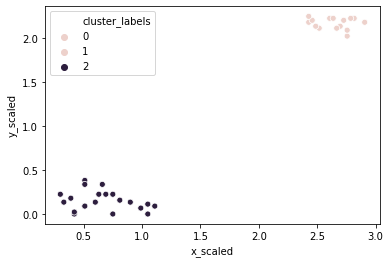

In [10]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

## Dendrograms
The dinstance matrix has been bugging me, because it isn't a distance matrix in the sense of N^2. It is actually a linkage matrix, which encodes a dendagram.

Each row describes a grouping of the next two nearest nodes, to form a new node that in the euclidean measure, is in the middle of both. It starts with the nearest nodes, and keeps combining them until all nodes are grouped. The array shows which nodes combined, and the distance between them.

Scipy then adds a helper column, which counts all the nodes underneath this grouping. You expect this number to remain small until they all combine in the last step.

If there are 12 nodes, the first combined node is numbered 13. Hence you see nodes much larger than the total number of original nodes.

So this matrix is all about drawing a dendogram. It doesn't show the distance between every node, but more the distance between the recursive partitions that are created by the dendogram as it grows.

In [56]:
[x for x in distance_matrix]

[array([0., 9., 0., 2.]),
 array([3.        , 6.        , 0.02250246, 2.        ]),
 array([20.        , 23.        ,  0.02996171,  2.        ]),
 array([16.        , 21.        ,  0.02996171,  2.        ]),
 array([14.        , 25.        ,  0.03747085,  2.        ]),
 array([15.        , 17.        ,  0.03747085,  2.        ]),
 array([18.        , 22.        ,  0.03747085,  2.        ]),
 array([34.        , 35.        ,  0.04500492,  2.        ]),
 array([30.        , 32.        ,  0.05992342,  2.        ]),
 array([4.        , 8.        , 0.06400919, 2.        ]),
 array([26.        , 40.        ,  0.06750738,  3.        ]),
 array([24.        , 27.        ,  0.06750738,  2.        ]),
 array([10.       , 12.       ,  0.0749417,  2.       ]),
 array([2.        , 5.        , 0.09026662, 2.        ]),
 array([28.        , 38.        ,  0.09265903,  3.        ]),
 array([ 7.        , 33.        ,  0.09265903,  2.        ]),
 array([ 1.        , 11.        ,  0.09486557,  2.        ])

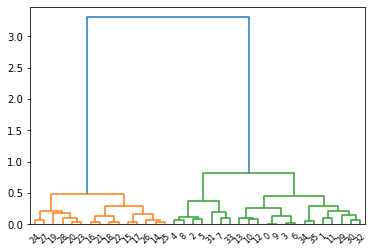

In [121]:
from scipy.cluster.hierarchy import dendrogram

d = dendrogram(distance_matrix)
plt.show()

In [146]:
# With a toy data set
arr = pd.DataFrame([[1,1], [1,1.1], [1.9,2], [2,2]])
arr

,0,1
0,1.0,1.0
1,1.0,1.1
2,1.9,2.0
3,2.0,2.0


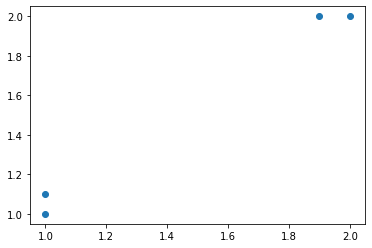

In [147]:
plt.scatter(arr[0], arr[1])
plt.show()

In [148]:
linkage_matrix = linkage(arr)
linkage_matrix

array([[0.        , 1.        , 0.1       , 2.        ],
       [2.        , 3.        , 0.1       , 2.        ],
       [4.        , 5.        , 1.27279221, 4.        ]])

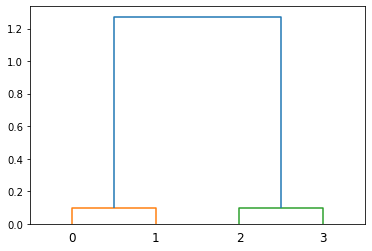

In [149]:
dendrogram(linkage_matrix)
plt.show()